In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numba import jit
from scipy.integrate import solve_ivp
from scipy.misc import imread
import matplotlib.image as image

In [25]:
def BSGC(t,z,K1,K2,k1,k2,g1,g2,q,alpha,beta):
    eta=(1+(z[0]/K1)**q)**(-1)
    gamma=(1+(z[1]/K2)**q)**(-1)
    N1=g1*eta*gamma*z[0]-k1*z[0]
    N2=(g2*z[1]+g1*(1-eta)*z[0])*gamma-k2*z[1]
    return [N1, N2]

def BSGC_delay(t,z,K1,K2,k1,k2,g1,g2,q,alpha,beta):
    eta=(1+(z[1]/K1)**q)**(-1)    #z=[N1,X1,N2,X2]
    gamma=(1+(z[3]/K2)**q)**(-1)
    N1=g1*eta*gamma*z[0]-k1*z[0]
    X1=alpha*(z[0]-z[1])
    N2=(g2*z[2]+g1*(1-eta)*z[0])*gamma-k2*z[2]
    X2=beta*(z[2]-z[3])
    return [N1,X1,N2,X2]

def trajectory(g1,g2,k1,k2,i,j,col,alpha,beta):  
    sol_delay = solve_ivp(lambda t, z: BSGC_delay(t, z, K1,K2,k1,k2,g1,g2,q,alpha,beta), [0, T], [init_m,init_m,init_d,init_d],dense_output=True)
    z_delay = sol_delay.sol(t)
    axes[i,j].plot(t,z_delay[0].T,'r',label='Delay Mother',lw=3)
    axes[i,j].plot(t,z_delay[2].T,'g',label='Delay Daughter',lw=3)
    
    sol = solve_ivp(lambda t, z: BSGC(t, z, K1,K2,k1,k2,g1,g2,q,alpha,beta), [0, T], [init_m, init_d],dense_output=True)
    z1 = sol.sol(t)
    axes[i,j].plot(t,z1[0].T,'C0',label='Mother',lw=3, ls='--')
    axes[i,j].plot(t,z1[1].T,'y',label='Daughter',lw=3, ls='--')

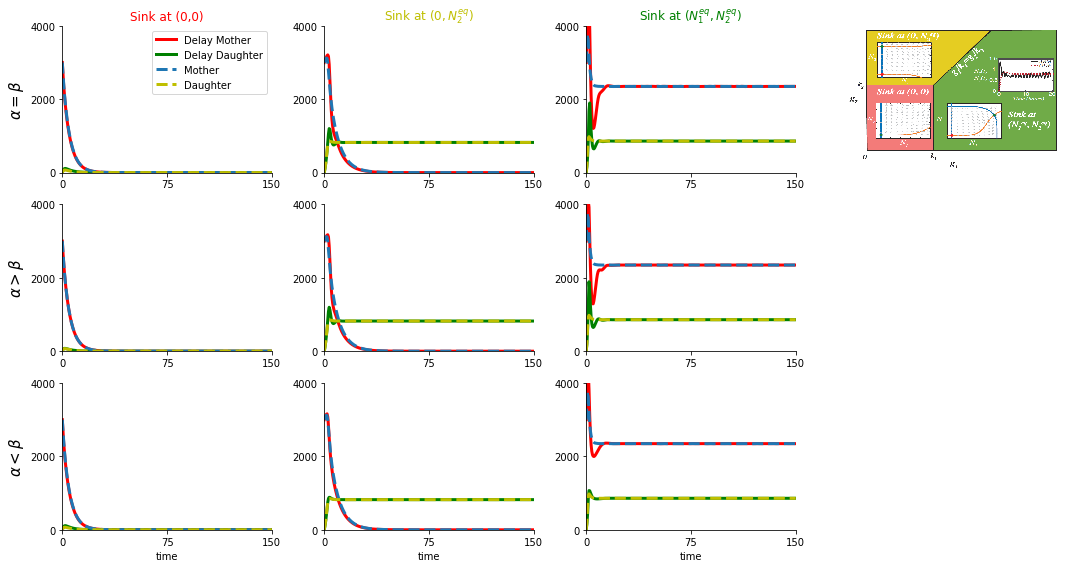

In [30]:
#stochastic model parameters
init_m=3000
init_d=0
g1_init=g2_init=0.5    #### 
k1_init=k2_init=0.5    ####
kappa_init=1

#ODE model hyeprparameters
q=5
K1=5000
K2=1000
alpha=[1,10,1]
beta=[1,1,10]
T=150

g1=[0.6,0.9,1.2]
g2=[0.6,1.1,1.1]
k1=[0.8,0.8,0.8]
k2=[0.8,0.8,0.8]
kappa=1
fig, axes = plt.subplots(len(alpha),4,figsize=(15,8))
plt.subplots_adjust(left=0.1, bottom=0.1)
t = np.linspace(0, T, 300)
tag=['Sink at (0,0)',r'Sink at $(0,N_2^{eq})$',r'Sink at $(N_1^{eq},N_2^{eq})$']
col=['r','y','g']
for j in range(len(g1)):
    for i in range(len(alpha)):
        trajectory(g1[j],g2[j],k1[j],k2[j],i,j,col[j],alpha[i],beta[i])
        axes[i,j].set_ylim([0,4000])
        axes[i,j].set_yticks([0,2000,4000])
        axes[i,j].set_xlim([0,T])
        axes[i,j].set_xticks([0,T/2,T])
        axes[i,j].spines['right'].set_color('none')
        axes[i,j].spines['top'].set_color('none')

for i in range(3):
    axes[0,i].set_title(tag[i],color=col[i])
    axes[2,i].set_xlabel('time')
    axes[i,3].axis('off')
axes[0,0].set_ylabel(r'$\alpha=\beta$',fontsize=15)
axes[1,0].set_ylabel(r'$\alpha>\beta$',fontsize=15)
axes[2,0].set_ylabel(r'$\alpha<\beta$',fontsize=15)

im = image.imread('bsgc_dynamics.png')
axes[0,0].legend()
axes[0,3].imshow(im,aspect='auto')
plt.tight_layout()
fig.savefig('delayed_vs_nodelay.jpg', format='jpg', dpi=500,bbox_inches="tight")

Keep $\kappa$ at 1 for BSGC. The bifurcation diagram (last image) given above shows the possible behavior of the system at different points in the parameter space.